In [1]:
import netCDF4 as nc
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime as dt
import xarray as xr
from calendar import monthrange

In [2]:
#basic rmse function
def calc_rmse(column_a, column_b):
    return np.power(np.nanmean(((column_a - column_b) ** 2)), .5)

In [3]:
#path to station observations
#path_to_ec_obs = '/data/comparison_data/US-Prr-ec-daily.csv'
#path_to_met_data = '/data/comparison_data/poker_flats_2010-2022_daily.csv'
path_to_met_data = '/data/comparison_data/US-Prr-monthly.csv'
#netCDF coordinates to extract data from
#poker flats
cell_x_coord = 1
cell_y_coord = 0

In [4]:
met_data = pd.read_csv(path_to_met_data)
met_data['m_y'] = pd.to_datetime(met_data['m_y'])
met_data['year'] = met_data['m_y'].dt.year
met_data = met_data.replace(-9999.0, np.nan)
met_data.head()

,Unnamed: 0,Year_x,Month_x,GPP1 (gC/m2/d),RECO1 (gC/m2/d),NEE1 (gC/m2/d),GPP2 (gC/m2/d),RECO2 (gC/m2/d),NEE2 (gC/m2/d),P_RAIN,...,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_1_5_1,TS_1_6_1,year
0,0,2010,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
1,1,2010,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
2,2,2010,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
3,3,2010,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010
4,4,2010,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010


In [5]:
gpp_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/GPP_monthly_tr.nc')
#gpp_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/GPP_monthly_tr.nc')
gpp_ds = gpp_ds.convert_calendar('standard', use_cftime=True, align_on='date')
gpp = gpp_ds.variables['GPP'][:, cell_y_coord, cell_x_coord]

npp_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/NPP_monthly_tr.nc')
#npp_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/NPP_monthly_tr.nc')
npp_ds = npp_ds.convert_calendar('standard', use_cftime=True, align_on='date')
npp = npp_ds.variables['NPP'][:, cell_y_coord, cell_x_coord]

rg_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RG_monthly_tr.nc')
#rg_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RG_monthly_tr.nc')
rg_ds = rg_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rg = rg_ds.variables['RG'][:, cell_y_coord, cell_x_coord]


rh_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RH_monthly_tr.nc')
#rh_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RH_monthly_tr.nc')
rh_ds = rh_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rh = rh_ds.variables['RH'][:, cell_y_coord, cell_x_coord]

rm_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RM_monthly_tr.nc')
#rm_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RM_monthly_tr.nc')
rm_ds = rm_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rm = rm_ds.variables['RM'][:, cell_y_coord, cell_x_coord]

snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SNOWTHICK_monthly_tr.nc')
#snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SNOWTHICK_monthly_tr.nc')
snowthick_ds = snowthick_ds.convert_calendar('standard', use_cftime=True, align_on='date')
snowthick = snowthick_ds.variables['SNOWTHICK'][:, cell_y_coord, cell_x_coord]

pet_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/PET_monthly_tr.nc')
#pet_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/PET_monthly_tr.nc')
pet_ds = pet_ds.convert_calendar('standard', use_cftime=True, align_on='date')
pet = pet_ds.variables['PET'][:, cell_y_coord, cell_x_coord]

eet_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/EET_monthly_tr.nc')
#eet_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/EET_monthly_tr.nc')
eet_ds = eet_ds.convert_calendar('standard', use_cftime=True, align_on='date')
eet = eet_ds.variables['EET'][:, cell_y_coord, cell_x_coord]

rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RAINFALL_monthly_tr.nc')
#rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RAINFALL_monthly_tr.nc')
rainfall_ds = rainfall_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rainfall = rainfall_ds.variables['RAINFALL'][:, cell_y_coord, cell_x_coord]

rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/RAINFALL_monthly_tr.nc')
#rainfall_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/RAINFALL_monthly_tr.nc')
rainfall_ds = rainfall_ds.convert_calendar('standard', use_cftime=True, align_on='date')
rainfall = rainfall_ds.variables['RAINFALL'][:, cell_y_coord, cell_x_coord]

#TRANSPIRATION
transpiration_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/TRANSPIRATION_monthly_tr.nc')
#transpiration_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/TRANSPIRATION_monthly_tr.nc')
transpiration_ds = transpiration_ds.convert_calendar('standard', use_cftime=True, align_on='date')
transpiration = transpiration_ds.variables['TRANSPIRATION'][:, cell_y_coord, cell_x_coord]

#ALD
ald_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/ALD_yearly_tr.nc')
#ald_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/ALD_yearly_tr.nc')
ald_ds = ald_ds.convert_calendar('standard', use_cftime=True, align_on='date')
ald = ald_ds.variables['ALD'][:, cell_y_coord, cell_x_coord]

#WATERTAB
watertab_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/WATERTAB_monthly_tr.nc')
#watertab_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/WATERTAB_monthly_tr.nc')
watertab_ds = watertab_ds.convert_calendar('standard', use_cftime=True, align_on='date')
watertab = watertab_ds.variables['WATERTAB'][:, cell_y_coord, cell_x_coord]

#MOSSDZ
mossdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/MOSSDZ_yearly_tr.nc')
#mossdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/MOSSDZ_yearly_tr.nc')
mossdz_ds = mossdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
mossdz = mossdz_ds.variables['MOSSDZ'][:, cell_y_coord, cell_x_coord]

#DEEPDZ
deepdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/DEEPDZ_yearly_tr.nc')
#deepdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/DEEPDZ_yearly_tr.nc')
deepdz_ds = deepdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
deepdz = deepdz_ds.variables['DEEPDZ'][:, cell_y_coord, cell_x_coord]

#SHLWDZ
shlwdz_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SHLWDZ_yearly_tr.nc')
#shlwdz_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SHLWDZ_yearly_tr.nc')
shlwdz_ds = shlwdz_ds.convert_calendar('standard', use_cftime=True, align_on='date')
shlwdz = shlwdz_ds.variables['SHLWDZ'][:, cell_y_coord, cell_x_coord]

#LAI
lai_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAI_monthly_tr.nc')
#lai_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAI_monthly_tr.nc')
lai_ds = lai_ds.convert_calendar('standard', use_cftime=True, align_on='date')
lai = lai_ds.variables['LAI'][:, cell_y_coord, cell_x_coord]

#DSNOW
snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/SNOWTHICK_monthly_tr.nc')
#snowthick_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/SNOWTHICK_monthly_tr.nc')
snowthick_ds = snowthick_ds.convert_calendar('standard', use_cftime=True, align_on='date')
snowthick = snowthick_ds.variables['SNOWTHICK'][:, cell_y_coord, cell_x_coord]

In [6]:
dates = gpp_ds.indexes['time'].to_datetimeindex()
len(dates)
dates_yearly = ald_ds.indexes['time'].to_datetimeindex()

In [7]:
gpp_ds.indexes['time']

CFTimeIndex([1901-01-01 00:00:00, 1901-02-01 00:00:00, 1901-03-01 00:00:00,
             1901-04-01 00:00:00, 1901-05-01 00:00:00, 1901-06-01 00:00:00,
             1901-07-01 00:00:00, 1901-08-01 00:00:00, 1901-09-01 00:00:00,
             1901-10-01 00:00:00,
             ...
             2015-03-01 00:00:00, 2015-04-01 00:00:00, 2015-05-01 00:00:00,
             2015-06-01 00:00:00, 2015-07-01 00:00:00, 2015-08-01 00:00:00,
             2015-09-01 00:00:00, 2015-10-01 00:00:00, 2015-11-01 00:00:00,
             2015-12-01 00:00:00],
            dtype='object', length=1380, calendar='standard', freq='MS')

In [8]:
tem_output_df = pd.DataFrame({'date': dates, 'GPP': gpp, 'NPP': npp, 'RG': rg, 'RH': rh, 'RM': rm, 
                              'SNOWTHICK': snowthick, 'PET': pet, 'EET': eet, 'RAINFALL': rainfall,
                              'TRANSPIRATION': transpiration, 'WATERTAB': watertab, 'LAI': lai, 'SNOWTHICK': snowthick})
tem_output_df['month'] = pd.DatetimeIndex(tem_output_df['date']).month
tem_output_df['year'] = pd.DatetimeIndex(tem_output_df['date']).year
tem_output_df['m_y'] = pd.to_datetime(tem_output_df['month'].astype(str) + '-'+ tem_output_df['year'].astype(str), format='%m-%Y')

In [9]:
tem_output_df_yearly = pd.DataFrame({'date': dates_yearly, 'ALD': ald, 'MOSSDZ': mossdz, 'SHLWDZ': shlwdz, 'DEEPDZ': deepdz})
tem_output_df_yearly['year'] = pd.DatetimeIndex(tem_output_df_yearly['date']).year


In [10]:
#ec_data.columns

In [11]:
met_data.columns.to_list()

['Unnamed: 0',
 'Year_x',
 'Month_x',
 'GPP1 (gC/m2/d)',
 'RECO1 (gC/m2/d)',
 'NEE1 (gC/m2/d)',
 'GPP2 (gC/m2/d)',
 'RECO2 (gC/m2/d)',
 'NEE2 (gC/m2/d)',
 'P_RAIN',
 'm_y',
 'Year_y',
 'Month_y',
 'TA',
 'RH',
 'PA',
 'SW_IN',
 'D_SNOW',
 'SWC_1_1_1',
 'SWC_1_2_1',
 'SWC_1_3_1',
 'SWC_1_4_1',
 'SWC_1_5_1',
 'TS_1_1_1',
 'TS_1_2_1',
 'TS_1_3_1',
 'TS_1_4_1',
 'TS_1_5_1',
 'TS_1_6_1',
 'year']

In [12]:
tem_comparison_years = tem_output_df[tem_output_df['year']>=2011]
yearly_tem_comparison_years = tem_output_df_yearly[tem_output_df_yearly['year']>=2011]
#ec_data = ec_data[ec_data['Year']>=2011]
met_data = met_data[met_data['year']>=2011]

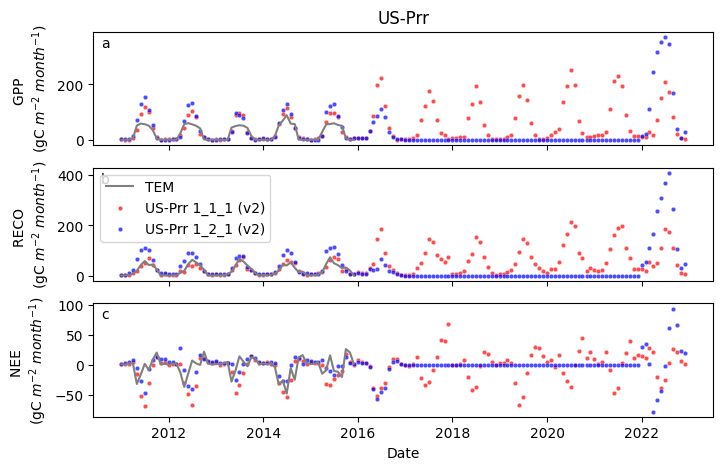

In [13]:
fig, axes = plt.subplots(3,1, figsize=(8,5), sharex=True)
axes[0].set(title='US-Prr', ylabel='GPP \n(gC $m^{-2}$ $month^{-1}$)')
sns.lineplot(data=tem_comparison_years, x='m_y', y='GPP', ax=axes[0], color='grey')
#sns.scatterplot(data=ec_data, x='m_y', y='GPP_filled', ax=axes[0], color='black', s=10, alpha=0.7)
sns.scatterplot(data=met_data, x='m_y', y='GPP1 (gC/m2/d)', ax=axes[0], color='red', s=10, alpha=0.7)
sns.scatterplot(data=met_data, x='m_y', y='GPP2 (gC/m2/d)', color='blue', ax=axes[0], alpha=0.7, s=10)


sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'], ax=axes[1], color='grey', label = 'TEM',)
#sns.scatterplot(data=station_years, x='m_y', y='RE_filled', ax=axes[1], color='red', s=10, alpha=0.7)
#sns.scatterplot(data=ec_data, x='m_y', y='RE_filled', ax=axes[1], color='black', s=10, alpha=0.7, label = 'US-Prr 1_1_1 (v1)')
sns.scatterplot(data=met_data, x='m_y', y='RECO1 (gC/m2/d)', ax=axes[1], color='red', s=10, alpha=0.7, label='US-Prr 1_1_1 (v2)')
sns.scatterplot(data=met_data, x='m_y', y='RECO2 (gC/m2/d)', ax=axes[1], color='blue', s=10, alpha=0.7, label='US-Prr 1_2_1 (v2)')

sns.lineplot(data=tem_comparison_years, x='m_y', y=(tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'])-tem_comparison_years['GPP'],ax=axes[2], color='grey')
#sns.scatterplot(data=ec_data, x='m_y', y=ec_data['RE_filled'] - ec_data['GPP_filled'], ax=axes[2], color='black', s=10, alpha=0.7)
sns.scatterplot(data=met_data, x='m_y', y='NEE1 (gC/m2/d)', ax=axes[2], color='red', s=10, alpha=0.7)
sns.scatterplot(data=met_data, x='m_y', y='NEE2 (gC/m2/d)', ax=axes[2], color='blue', s=10, alpha=0.7)

axes[1].set(ylabel='RECO \n(gC $m^{-2}$ $month^{-1}$)')
axes[2].set(ylabel='NEE \n(gC $m^{-2}$ $month^{-1}$)', xlabel='Date', )

axes[0].text(0.02, 0.9, 'a', horizontalalignment='center', verticalalignment='center', transform=axes[0].transAxes)
axes[1].text(0.02, 0.9, 'b', horizontalalignment='center', verticalalignment='center', transform=axes[1].transAxes)
axes[2].text(0.02, 0.9, 'c', horizontalalignment='center', verticalalignment='center', transform=axes[2].transAxes)

plt.savefig('US-Prr_carbon_flux.jpg', dpi=300)

In [14]:
#group by year and month, taking sum of daily ec measurements
#ec_data_yearly = ec_data.drop(columns=['m_y']).groupby(by=['Year']).sum().reset_index() 

In [15]:
#ec_data_yearly.head()

In [16]:
#np.nanmean(ec_data_yearly[ec_data_yearly['Year']>2010]['GPP_filled'])

Text(0.5, 0, 'Date')

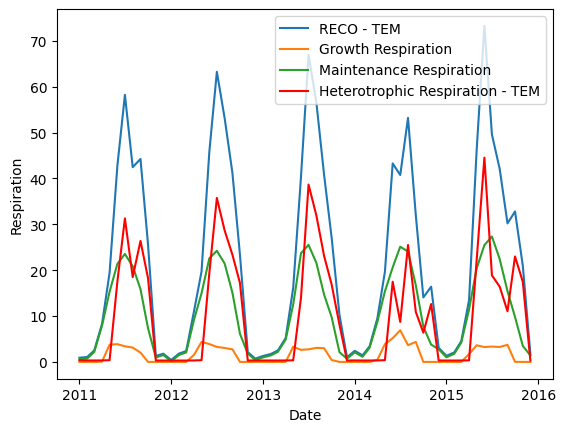

In [17]:
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG']+tem_comparison_years['RH']+tem_comparison_years['RM'], label = 'RECO - TEM')
#sns.scatterplot(data=station_years, x='m_y', y='RE_filled', label = 'RECO US-Prr measured', color='orange')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RG'], label = 'Growth Respiration')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RM'], label = 'Maintenance Respiration')
sns.lineplot(data=tem_comparison_years, x='m_y', y=tem_comparison_years['RH'], label = 'Heterotrophic Respiration - TEM', color='red')

plt.ylabel('Respiration')
plt.xlabel('Date')
#plt.savefig('US-Prr_RECO.jpg', dpi=300)

## Soil Water Content

In [18]:
#soil_layer_synth=pd.read_csv('/work/scripts/caribou-poker-exp/soil_layer_synthesis/layersytnth.csv')
soil_layer_synth=pd.read_csv('/work/scripts/caribou-poker-exp/soil_layer_synthesis/datastdz.csv')

In [19]:
soil_layer_synth = soil_layer_synth[(soil_layer_synth['x']==1) & (soil_layer_synth['y']==0)] #& (soil_layer_synth['z']==.1)]
soil_layer_synth['time'] = pd.to_datetime(soil_layer_synth['time'])
soil_layer_synth['year'] = pd.DatetimeIndex(soil_layer_synth['time']).year
soil_layer_synth['LWCLAYERtop'] = soil_layer_synth['LWCLAYERtop']*100
soil_layer_synth['LWCLAYERbot'] = soil_layer_synth['LWCLAYERbot']*100

In [20]:
len(soil_layer_synth[soil_layer_synth['year']==1901])

12

In [21]:
layer = 2

In [22]:
vwc_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/VWCLAYER_monthly_tr.nc')
#vwc_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/VWCLAYER_monthly_tr.nc')
vwc_ds = vwc_ds.convert_calendar('standard', use_cftime=True, align_on='date')
vwc = vwc_ds.variables['VWCLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]*100
print(vwc)

<xarray.Variable (time: 1380)>
array([83.83838384, 80.02930166, 80.02930166, ..., 31.5406775 ,
       31.47524056, 32.79938319])


In [23]:
lwc_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LWCLAYER_monthly_tr.nc')
#lwc_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LWCLAYER_monthly_tr.nc')
lwc_ds = lwc_ds.convert_calendar('standard', use_cftime=True, align_on='date')
lwc = lwc_ds.variables['LWCLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]*100
print(lwc)

<xarray.Variable (time: 1380)>
array([ 0.        ,  0.        ,  0.        , ..., 31.5406775 ,
       14.62938306,  0.        ])


In [24]:
ts_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/TLAYER_monthly_tr.nc')
#ts_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/TLAYER_monthly_tr.nc')
ts_ds = ts_ds.convert_calendar('standard', use_cftime=True, align_on='date')
ts = ts_ds.variables['TLAYER'][:,:,cell_y_coord, cell_x_coord][:,layer]
print(ts)

<xarray.Variable (time: 1380)>
array([-0.98083799, -0.51080605, -0.46890938, ...,  0.15701957,
       -0.16966942, -0.61080202])
Attributes:
    units:      degree_C
    long_name:  Temperature by layer


In [25]:
layertype_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAYERTYPE_monthly_tr.nc')
#layertype_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAYERTYPE_monthly_tr.nc')
layertype_ds = layertype_ds.convert_calendar('standard', use_cftime=True, align_on='date')
layertype = layertype_ds.variables['LAYERTYPE'][:,:,cell_y_coord, cell_x_coord]
print(layertype)

<xarray.Variable (time: 1380, layer: 22)>
array([[ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan],
       ...,
       [ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan],
       [ 0.,  1.,  1., ...,  3., nan, nan]])
Attributes:
    units:      
    long_name:  0:moss 1:shlw 2:deep 3:mineral


In [26]:
layerdepth_ds = xr.open_dataset('/data/workflows/poker_flats_merged_data/output/LAYERDEPTH_monthly_tr.nc')
#layerdepth_ds = xr.open_dataset('/data/workflows/poker_flats_test/output/LAYERDEPTH_monthly_tr.nc')
layerdepth_ds = layerdepth_ds.convert_calendar('standard', use_cftime=True, align_on='date')
layerdepth = layerdepth_ds.variables['LAYERDEPTH'][:,:,cell_y_coord, cell_x_coord][:,layer]
print(layerdepth)

<xarray.Variable (time: 1380)>
array([0.08, 0.08, 0.08, ..., 0.08, 0.08, 0.08])
Attributes:
    units:      m
    long_name:  Layer depth from the surface


In [27]:
swc_dates = vwc_ds.indexes['time'].to_datetimeindex()
swc_df = pd.DataFrame({'date':swc_dates, 'vwc': vwc, 'lwc': lwc, 'ts': ts, 'layerdepth': layerdepth})

In [28]:
swc_df['month'] = pd.DatetimeIndex(swc_df['date']).month
swc_df['year'] = pd.DatetimeIndex(swc_df['date']).year
swc_df['m_y'] = pd.to_datetime(swc_df['month'].astype(str) + '-'+ swc_df['year'].astype(str), format='%m-%Y')

<AxesSubplot:xlabel='m_y', ylabel='layerdepth'>

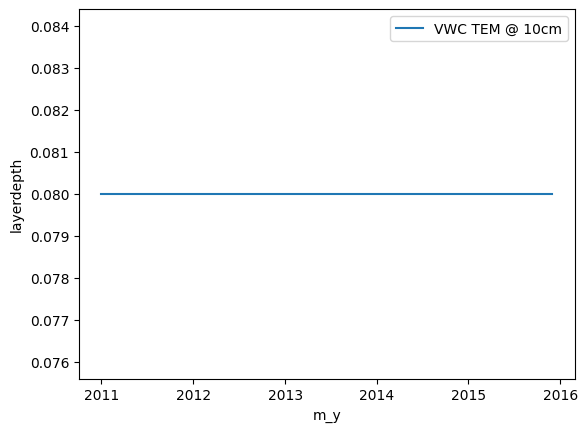

In [29]:
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='layerdepth', label='VWC TEM @ 10cm') #-0.1 m

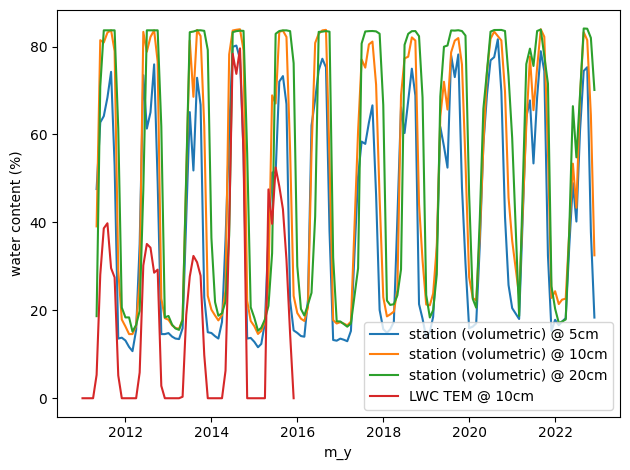

In [30]:
fig, ax = plt.subplots()
sns.lineplot(data = met_data, x='m_y', y='SWC_1_1_1', label='station (volumetric) @ 5cm') #-0.05 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='SWC_1_2_1', label='station (volumetric) @ 10cm') #-0.1 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='SWC_1_3_1', label='station (volumetric) @ 20cm') #-0.2 m
#sns.lineplot(data = met_data, x='m_y', y='SWC_1_4_1') #-0.3 m
#sns.lineplot(data = met_data, x='m_y', y='SWC_1_5_1') #-0.4 m

#ax2 = plt.twinx()
#sns.lineplot(data=df.column2, color="b", ax=ax2)

#sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='vwc', label='VWC TEM @ 10cm') #-0.1 m
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='lwc', label='LWC TEM @ 10cm') #-0.1 m
#sns.lineplot(data = soil_layer_synth.loc[soil_layer_synth['year']>2010], x='time', y='LWCLAYERtop', label='LWC TEM @ 10cm (script)') #-0.1 m
#sns.lineplot(data = soil_layer_synth.loc[soil_layer_synth['year']>2010], x='time', y='LWCLAYERbot', label='LWC TEM @ 10cm (script)') #-0.1 m


plt.ylabel('water content (%)')
plt.legend(loc='lower right')

fig.tight_layout()

Text(0, 0.5, 'T Soil')

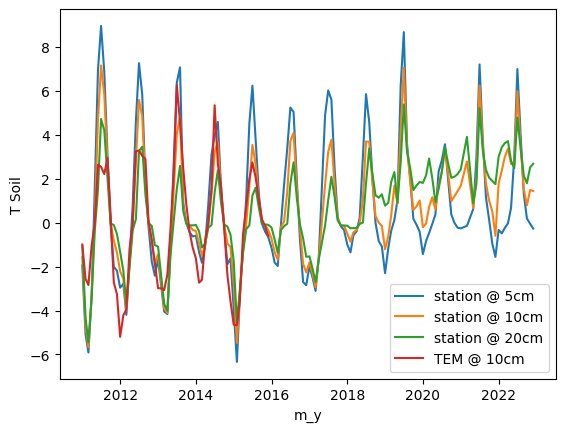

In [31]:
fig, ax = plt.subplots()
sns.lineplot(data = met_data, x='m_y', y='TS_1_1_1', label='station @ 5cm') #-0.05 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_2_1', label='station @ 10cm') #-0.1 m
sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_3_1', label='station @ 20cm') #-0.2 m
             
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['ts'], label='TEM @ 10cm') #-0.1 m
plt.ylabel('T Soil')

In [32]:
merged_df = pd.merge(swc_df, tem_comparison_years, on='date')

In [33]:
met_data

,Unnamed: 0,Year_x,Month_x,GPP1 (gC/m2/d),RECO1 (gC/m2/d),NEE1 (gC/m2/d),GPP2 (gC/m2/d),RECO2 (gC/m2/d),NEE2 (gC/m2/d),P_RAIN,...,SWC_1_3_1,SWC_1_4_1,SWC_1_5_1,TS_1_1_1,TS_1_2_1,TS_1_3_1,TS_1_4_1,TS_1_5_1,TS_1_6_1,year
12,12,2011,1,2.689596,3.702930,1.013334,3.571335,4.390437,0.819103,3.0,...,NaN,NaN,NaN,-1.948722,-1.574809,-1.056536,-0.375067,-0.184591,-0.432228,2011
13,13,2011,2,0.504859,1.450257,0.945398,1.416844,4.392093,2.975248,17.0,...,NaN,NaN,NaN,-5.075413,-4.701792,-4.322515,-3.730365,-3.304167,-2.246144,2011
14,14,2011,3,0.924026,2.294072,1.370046,4.529625,8.816251,4.286626,3.0,...,NaN,NaN,NaN,-5.913799,-5.675143,-5.455655,-5.069458,-4.794909,-3.802336,2011
15,15,2011,4,5.450350,10.595408,5.145058,12.715497,20.772091,8.056593,3.0,...,NaN,NaN,NaN,-3.302199,-3.314346,-3.400999,-3.431135,-3.466082,-3.310049,2011
16,16,2011,5,34.613969,18.778907,-15.835061,71.954382,66.109201,-5.845181,3.5,...,18.668342,25.856623,21.364275,1.570231,0.158218,-0.370958,-0.512710,-0.765147,-1.443693,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,151,2022,8,172.143095,175.243983,3.100888,347.097889,409.740752,62.642863,63.5,...,69.162491,81.664510,76.097014,4.043485,3.492134,3.395774,3.600310,2.758546,0.238595,2022
152,152,2022,9,81.015993,108.353769,27.337777,169.675557,264.044531,94.368974,39.0,...,84.110563,81.727882,76.405067,1.299983,1.528081,2.148819,2.756389,2.138210,0.151891,2022
153,153,2022,10,19.200998,40.810212,21.609214,37.596832,105.285708,67.688876,28.0,...,84.060499,81.623915,76.425855,0.193642,0.790048,1.795578,2.340833,1.778759,0.066593,2022
154,154,2022,11,6.136981,12.626030,6.489049,6.889540,29.696461,22.806921,14.0,...,81.977847,81.332171,75.965979,-0.046560,1.490735,2.519482,2.571293,1.892466,0.066099,2022


(0.0, 200.0)

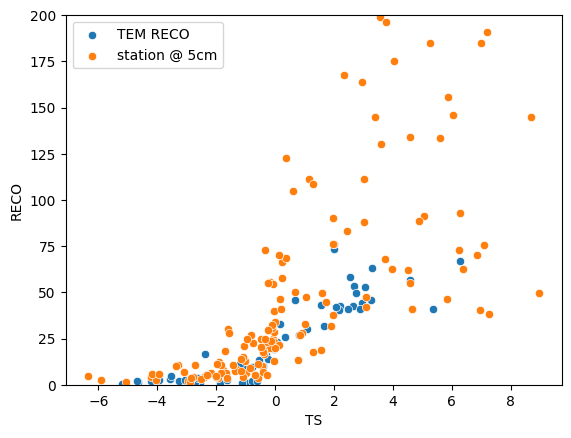

In [34]:
sns.scatterplot(x=merged_df['ts'], y=merged_df['RH']+merged_df['RG']+merged_df['RM'], label = 'TEM RECO')
#sns.scatterplot(x=merged_df['ts'], y=merged_df['RH'], label = 'TEM RH')
sns.scatterplot(data = met_data, x='TS_1_1_1', y='RECO1 (gC/m2/d)', label='station @ 5cm')
plt.ylabel('RECO')
plt.xlabel('TS')
plt.ylim(0,200)

(array([14610., 14975., 15340., 15706., 16071., 16436., 16801.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

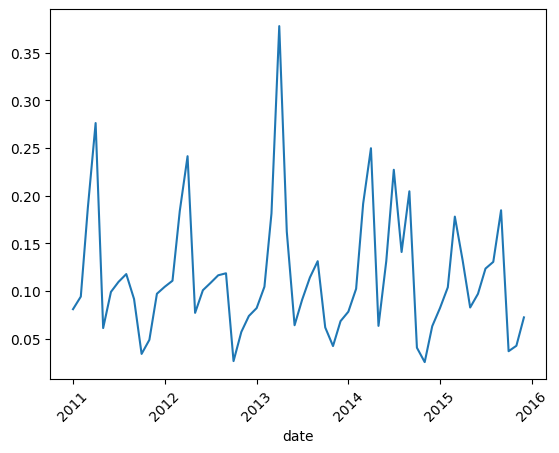

In [35]:
sns.lineplot(x=tem_comparison_years['date'], y=tem_comparison_years['EET']/tem_comparison_years['PET'])
plt.xticks(rotation = 45)

In [36]:
swc_df.head()

,date,vwc,lwc,ts,layerdepth,month,year,m_y
0,1901-01-01,83.838384,0.000000,-0.980838,0.08,1,1901,1901-01-01
1,1901-02-01,80.029302,0.000000,-0.510806,0.08,2,1901,1901-02-01
2,1901-03-01,80.029302,0.000000,-0.468909,0.08,3,1901,1901-03-01
3,1901-04-01,80.029302,0.000000,-0.186280,0.08,4,1901,1901-04-01
4,1901-05-01,80.449356,4.505662,-0.008925,0.08,5,1901,1901-05-01


In [37]:
met_data.columns.to_list()

['Unnamed: 0',
 'Year_x',
 'Month_x',
 'GPP1 (gC/m2/d)',
 'RECO1 (gC/m2/d)',
 'NEE1 (gC/m2/d)',
 'GPP2 (gC/m2/d)',
 'RECO2 (gC/m2/d)',
 'NEE2 (gC/m2/d)',
 'P_RAIN',
 'm_y',
 'Year_y',
 'Month_y',
 'TA',
 'RH',
 'PA',
 'SW_IN',
 'D_SNOW',
 'SWC_1_1_1',
 'SWC_1_2_1',
 'SWC_1_3_1',
 'SWC_1_4_1',
 'SWC_1_5_1',
 'TS_1_1_1',
 'TS_1_2_1',
 'TS_1_3_1',
 'TS_1_4_1',
 'TS_1_5_1',
 'TS_1_6_1',
 'year']

In [38]:
met_data.columns

Index(['Unnamed: 0', 'Year_x', 'Month_x', 'GPP1 (gC/m2/d)', 'RECO1 (gC/m2/d)',
       'NEE1 (gC/m2/d)', 'GPP2 (gC/m2/d)', 'RECO2 (gC/m2/d)', 'NEE2 (gC/m2/d)',
       'P_RAIN', 'm_y', 'Year_y', 'Month_y', 'TA', 'RH', 'PA', 'SW_IN',
       'D_SNOW', 'SWC_1_1_1', 'SWC_1_2_1', 'SWC_1_3_1', 'SWC_1_4_1',
       'SWC_1_5_1', 'TS_1_1_1', 'TS_1_2_1', 'TS_1_3_1', 'TS_1_4_1', 'TS_1_5_1',
       'TS_1_6_1', 'year'],
      dtype='object')

Text(0, 0.5, 'snow depth (cm)')

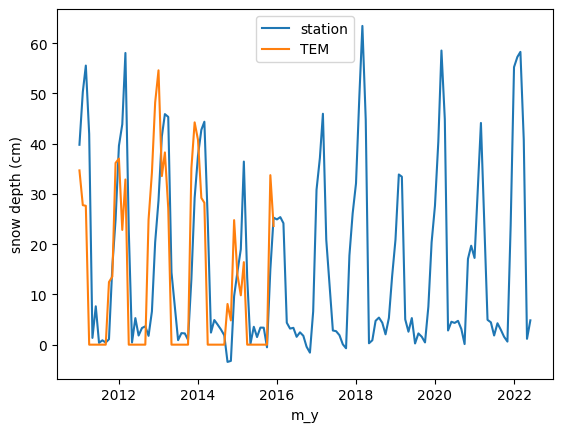

In [39]:
fig, ax = plt.subplots()
sns.lineplot(data =  met_data.loc[met_data['year']>2010], x='m_y', y='D_SNOW', label='station') #-0.05 m
             
sns.lineplot(data = tem_comparison_years, x='m_y', y=tem_comparison_years['SNOWTHICK']*100, label='TEM') #-0.1 m

plt.ylabel('snow depth (cm)')

In [40]:
met_data.loc[met_data['year']<=2016, 'D_SNOW'].median()

5.283904982580147

In [41]:
met_data.loc[met_data['year']>=2016, 'D_SNOW'].median()

4.939923677422188

Text(0, 0.5, 'snow depth (cm)')

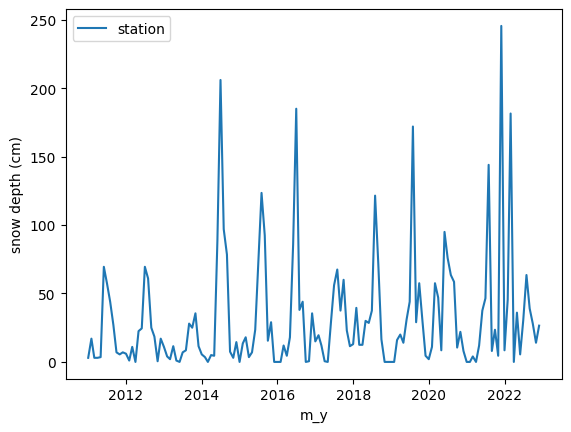

In [42]:
fig, ax = plt.subplots()
sns.lineplot(data =  met_data.loc[met_data['year']>2010], x='m_y', y='P_RAIN', label='station') #-0.05 m

plt.ylabel('snow depth (cm)')

In [43]:
met_data.loc[met_data['year']<=2016, 'P_RAIN'].median()

11.5

In [44]:
met_data.loc[met_data['year']>=2016, 'P_RAIN'].median()

22.5

In [45]:
met_data.loc[met_data['year']<=2016, 'TA'].median()

-1.2980709751588022

In [46]:
met_data.loc[met_data['year']>=2016, 'TA'].median()

-0.9355845504794914

In [47]:
met_data.columns

Index(['Unnamed: 0', 'Year_x', 'Month_x', 'GPP1 (gC/m2/d)', 'RECO1 (gC/m2/d)',
       'NEE1 (gC/m2/d)', 'GPP2 (gC/m2/d)', 'RECO2 (gC/m2/d)', 'NEE2 (gC/m2/d)',
       'P_RAIN', 'm_y', 'Year_y', 'Month_y', 'TA', 'RH', 'PA', 'SW_IN',
       'D_SNOW', 'SWC_1_1_1', 'SWC_1_2_1', 'SWC_1_3_1', 'SWC_1_4_1',
       'SWC_1_5_1', 'TS_1_1_1', 'TS_1_2_1', 'TS_1_3_1', 'TS_1_4_1', 'TS_1_5_1',
       'TS_1_6_1', 'year'],
      dtype='object')

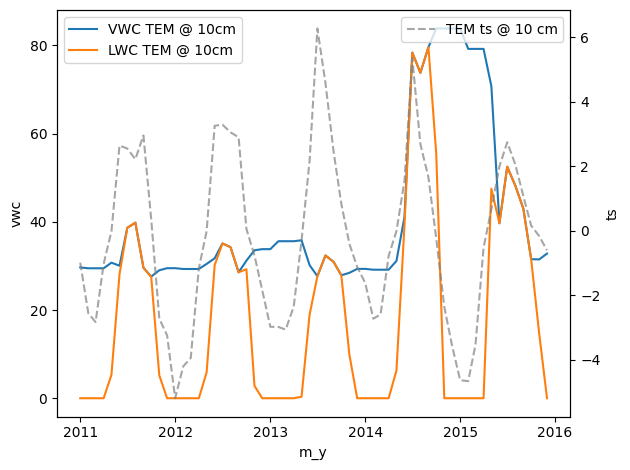

In [48]:
fig, ax = plt.subplots()
#sns.lineplot(data = met_data, x='m_y', y='TS_1_1_1', label='station @ 5cm') #-0.05 m
#sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_2_1', label='station @ 10cm') #-0.1 m
#sns.lineplot(data = met_data.loc[met_data['year']>2010], x='m_y', y='TS_1_3_1', label='station @ 20cm') #-0.2 m
             
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='vwc', label='VWC TEM @ 10cm') #-0.1 m
sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y='lwc', label='LWC TEM @ 10cm') #-0.1 m
#sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['lwc']*1.09, 
#             label='LWC (all ice) TEM @ 10cm', color='orange', alpha=0.5, linestyle='--') #-0.1 m

ax2 = ax.twinx()


sns.lineplot(data = swc_df.loc[swc_df['year']>2010], x='m_y', y=swc_df.loc[swc_df['year']>2010]['ts'], label='TEM ts @ 10 cm', 
             ax=ax2, color='grey', alpha=0.7, linestyle = '--') #-0.1 m
fig.tight_layout()
#plt.ylabel('soil temperature ($^\circ$C)')

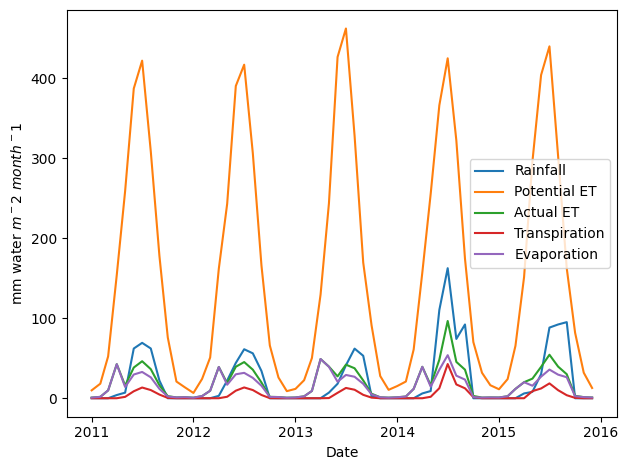

In [49]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_comparison_years, x='m_y', y='RAINFALL', label = 'Rainfall')
sns.lineplot(data=tem_comparison_years, x='m_y', y='PET', label = 'Potential ET')
sns.lineplot(data=tem_comparison_years, x='m_y', y='EET', label = 'Actual ET')
sns.lineplot(data=tem_comparison_years, x='m_y', y='TRANSPIRATION', label = 'Transpiration')
sns.lineplot(x=tem_comparison_years['m_y'], y=tem_comparison_years['EET']-tem_comparison_years['TRANSPIRATION'], label = 'Evaporation')
plt.ylabel('mm water $m^-2$ $month^-1$')
plt.xlabel('Date')
fig.tight_layout()

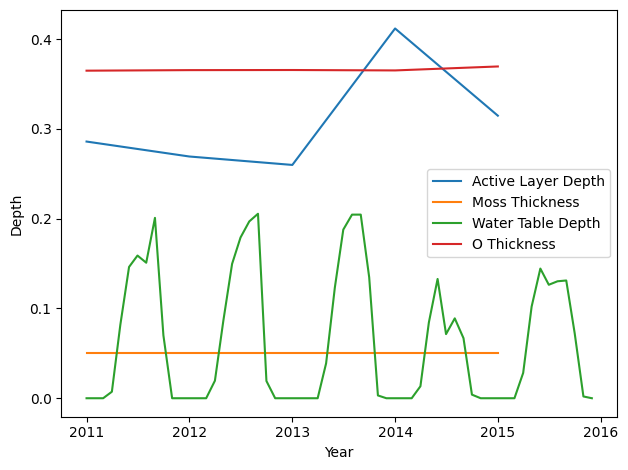

In [50]:
fig, ax = plt.subplots()
sns.lineplot(data=yearly_tem_comparison_years, x='date', y='ALD', label = 'Active Layer Depth')
sns.lineplot(data=yearly_tem_comparison_years, x='date', y='MOSSDZ', label = 'Moss Thickness')
sns.lineplot(data=tem_comparison_years, x='date', y='WATERTAB', label = 'Water Table Depth')
sns.lineplot(x=yearly_tem_comparison_years['date'], y=yearly_tem_comparison_years['SHLWDZ']+yearly_tem_comparison_years['DEEPDZ'], label = 'O Thickness')

#sns.lineplot(data=tem_comparison_years, x='m_y', y='PET', label = 'Potential ET')
#sns.lineplot(data=tem_comparison_years, x='m_y', y='EET', label = 'Actual ET')
#sns.lineplot(data=tem_comparison_years, x='m_y', y='TRANSPIRATION', label = 'Transpiration')
#sns.lineplot(x=tem_comparison_years['m_y'], y=tem_comparison_years['EET']-tem_comparison_years['TRANSPIRATION'], label = 'Evaporation')
#plt.ylabel('mm water $m^-2$ $month^-1$')
plt.xlabel('Year')
plt.ylabel('Depth')
fig.tight_layout()

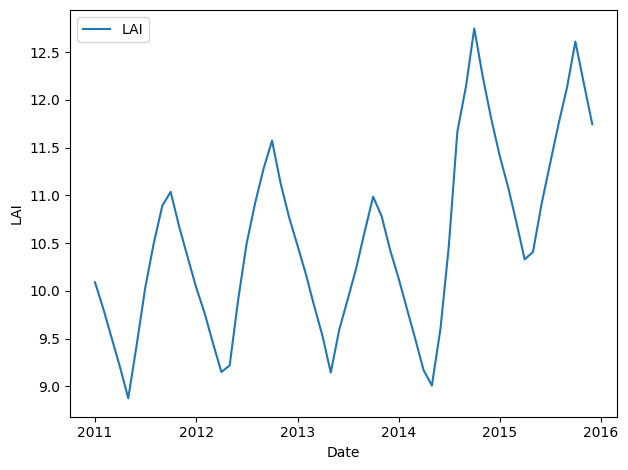

In [51]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_comparison_years, x='m_y', y='LAI', label = 'LAI')

plt.xlabel('Date')
fig.tight_layout()

<AxesSubplot:xlabel='date', ylabel='ALD'>

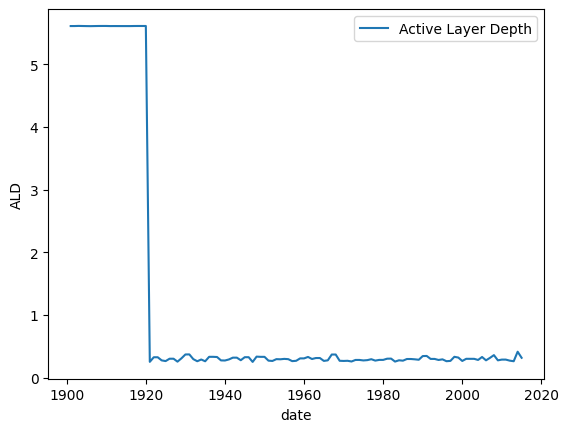

In [52]:
fig, ax = plt.subplots()
sns.lineplot(data=tem_output_df_yearly, x='date', y='ALD', label = 'Active Layer Depth')
